In [25]:
import csv
unique_entities_strict = set()
unique_entities_lenient = set()
entities = []

text = []
labels = []
labels_lenient = []


with open("./output/ner-crf-training-data.tsv", newline = '') as lines:  
    line_reader = csv.reader(lines, delimiter='\t')
    sentence = []
    entities = []
    pre_entity = "NEVER_EXISTS_ENTITY"
    for idx, line in enumerate(line_reader):
        ## . signal the begining of a new line
        ## skip empty line
        if line == []:
            continue
        if line[0] == '.':
            text.append(" ".join(sentence + [line[0]]))
            labels.append(" ".join(entities + [line[1]]))
            sentence, entities = [] , []
            strict_entity = line[1]
        else:
            sentence.append(line[0])
            if line[1] != "O" and pre_entity == line[1]:
                entities.append("I-"+line[1])
                strict_entity = "I-"+line[1]
            elif line[1] != "O" and pre_entity != line[1]:
                entities.append("B-"+line[1])
                strict_entity = "B-"+line[1]
            else:
                entities.append(line[1])
                strict_entity = line[1]
        
        pre_entity = line[1]
        labels_lenient.append(line[1])
        
        
        unique_entities_strict.add(strict_entity)
        unique_entities_lenient.add(line[1])
        entities.append(line[1])


O
Age
Age
Age
Age
Age
Sex
O
History
History
History
History
Clinical_event
O
O
Detailed_description
Detailed_description
O
Sign_symptom
O
Therapeutic_procedure
O
Therapeutic_procedure
Therapeutic_procedure
Nonbiological_location
Nonbiological_location
Nonbiological_location
O
O
O
O
O
O
Biological_structure
Sign_symptom
O
Sign_symptom
O
Sign_symptom
O
Disease_disorder
O
O
O
O
Sign_symptom
O
Sign_symptom
O
O
O
Detailed_description
Sign_symptom
O
Lab_value
Lab_value
Lab_value
Lab_value
O
O
Diagnostic_procedure
Diagnostic_procedure
O
O
O
O
Lab_value
Diagnostic_procedure
Diagnostic_procedure
Diagnostic_procedure
O
O
Biological_structure
Biological_structure
Biological_structure
Biological_structure
O
O
Detailed_description
Detailed_description
Detailed_description
Sign_symptom
Sign_symptom
Sign_symptom
O
Detailed_description
Sign_symptom
O
Biological_structure
Biological_structure
O
O
O
Diagnostic_procedure
Diagnostic_procedure
Diagnostic_procedure
Diagnostic_procedure
O
Diagnostic_procedur

In [19]:
import pandas as pd
new_df = pd.DataFrame({"text": text, "labels": labels})
new_df.head()
new_df.to_csv("./output/ner.csv")

In [20]:
print(f"Unique entities count:\nStrict: {len(unique_entities_strict)}\nLenient: {len(unique_entities_lenient)}")


Unique entities count:
Strict: 45
Lenient: 26


In [21]:
print(unique_entities_strict)

{'B-Therapeutic_procedure', 'I-Diagnostic_procedure', 'I-Nonbiological_location', 'I-Area', 'B-Distance', 'B-Area', 'I-Age', 'O', 'B-Lab_value', 'B-Duration', 'B-Age', 'B-Dosage', 'B-Coreference', 'B-Diagnostic_procedure', 'B-Nonbiological_location', 'I-Lab_value', 'B-Clinical_event', 'B-Frequency', 'I-Detailed_description', 'B-Activity', 'I-Dosage', 'B-Biological_structure', 'I-Clinical_event', 'I-Disease_disorder', 'B-Date', 'B-Detailed_description', 'B-Time', 'B-Administration', 'I-Time', 'I-Medication', 'I-Date', 'B-Outcome', 'B-History', 'I-History', 'I-Sign_symptom', 'B-Medication', 'I-Duration', 'B-Disease_disorder', 'B-Severity', 'I-Coreference', 'B-Sign_symptom', 'I-Distance', 'I-Therapeutic_procedure', 'I-Biological_structure', 'B-Sex'}


Visualize data

/home/le/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


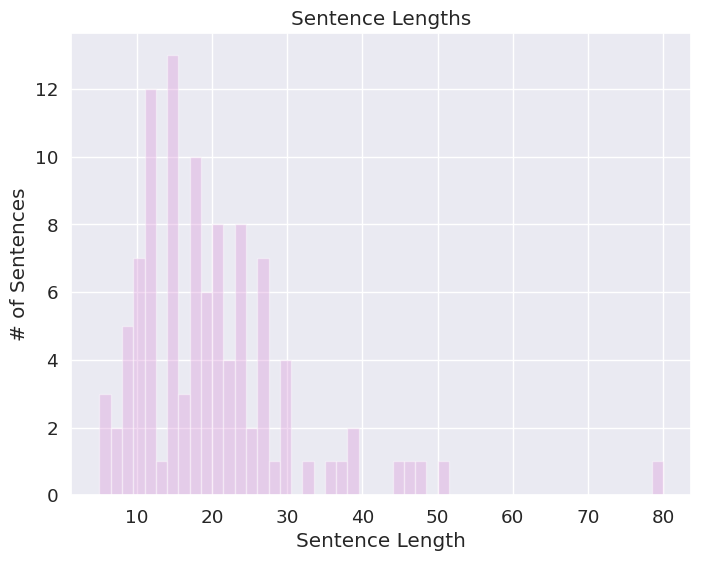

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

sentence_length = [len(str.split()) for str in text]
                   



sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.2)
plt.figure(figsize=(8,6))

# Plot the distribution of comment lengths.
sns.distplot(sentence_length, kde=False, rug=False,color='plum', bins=50)

plt.title('Sentence Lengths')
plt.xlabel('Sentence Length')
plt.ylabel('# of Sentences');

  entity  count
0      O   2083
1  B-Age      5
2    Age     25
3  I-Age     20
4  B-Sex      5


/home/le/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'O'),
 Text(1, 0, 'B-Age'),
 Text(2, 0, 'Age'),
 Text(3, 0, 'I-Age'),
 Text(4, 0, 'B-Sex'),
 Text(5, 0, 'Sex'),
 Text(6, 0, 'B-History'),
 Text(7, 0, 'History'),
 Text(8, 0, 'I-History'),
 Text(9, 0, 'B-Clinical_event'),
 Text(10, 0, 'Clinical_event'),
 Text(11, 0, 'B-Detailed_description'),
 Text(12, 0, 'Detailed_description'),
 Text(13, 0, 'I-Detailed_description'),
 Text(14, 0, 'B-Sign_symptom'),
 Text(15, 0, 'Sign_symptom'),
 Text(16, 0, 'B-Therapeutic_procedure'),
 Text(17, 0, 'Therapeutic_procedure'),
 Text(18, 0, 'I-Therapeutic_procedure'),
 Text(19, 0, 'B-Nonbiological_location'),
 Text(20, 0, 'Nonbiological_location'),
 Text(21, 0, 'I-Nonbiological_location'),
 Text(22, 0, 'B-Biological_structure'),
 Text(23, 0, 'Biological_structure'),
 Text(24, 0, 'B-Disease_disorder'),
 Text(25, 0, 'Disease_disorder'),
 Text(26, 0, 'B-Lab_value'),
 Text(27, 0, 'Lab_value'),
 Text(28, 0, 'I-Lab_value'),
 Text(29, 0, 'B-Diagnostic_procedure'),
 Text(30, 0, 'Diagnostic_procedure'),

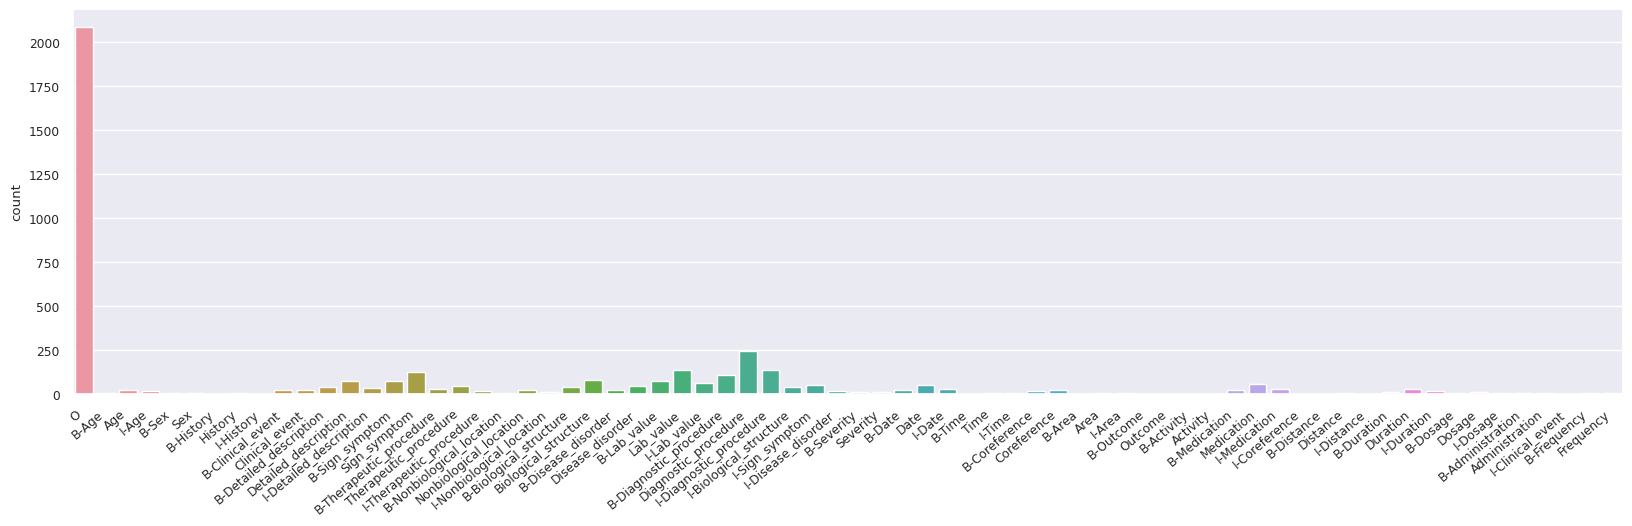

In [70]:
from collections import Counter
import itertools
all_labels = list(itertools.chain(*[l.split() for l in labels]))
label_count = dict(Counter(all_labels))
tmp_df = pd.DataFrame({"entity": label_count.keys(), "count": label_count.values()})
print(tmp_df.head())

sns.set(font_scale=0.8)
plt.figure(figsize=(20,5))
ax = sns.countplot(all_labels, x=label_count.keys())
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


In [48]:
from collections import Counter
import itertools
all_labels = list(itertools.chain(*[l.split() for l in labels]))
label_count = dict(Counter(all_labels))
tmp_df = pd.DataFrame({"entity": label_count.keys(), "count": label_count.values()})
print(tmp_df.head())

sns.set(font_scale=0.8)
plt.figure(figsize=(20,5))
ax = sns.countplot(all_labels, x=label_count.keys())
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")